yt : [INFO     ] 2024-04-04 16:57:27,827 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-04 16:57:27,828 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:27,829 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-04 16:57:27,829 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-04 16:57:28,289 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-04 16:57:28,289 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:28,290 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-04 16:57:28,290 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]
yt : [INFO     ] 2024-04-04 16:57:28,680 xlim = 0.009393 0.011807
yt : [INFO     ] 2024-04-04 16:57:28,680 ylim = -0.000150 0.000150
yt : [I


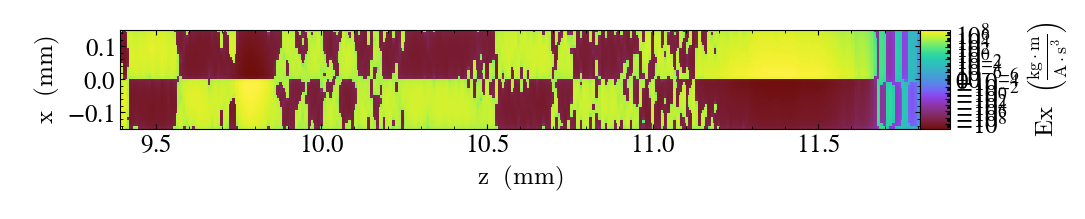

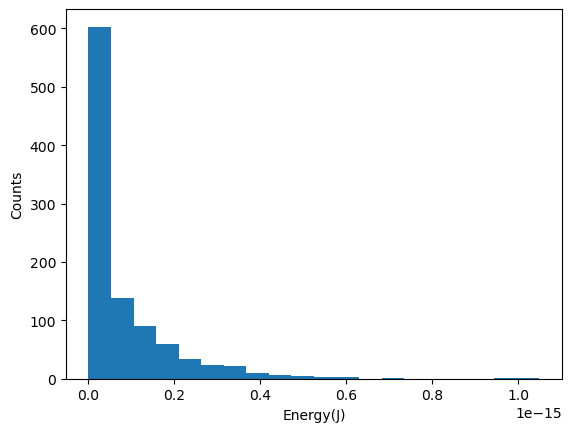

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt


ds = yt.load('warpx/diags/diag1000000p(0.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()
xplasmainit= ad[('plasma_e','particle_position_x')].to_ndarray()
yplasmainit= ad[('plasma_e','particle_position_y')].to_ndarray()
xdriverinit = ad[('driver','particle_position_x')].to_ndarray()
ydriverinit = ad[('driver','particle_position_y')].to_ndarray()
zdriverinit = ad[('driver','particle_position_z')].to_ndarray()
ds = yt.load('warpx/diags/diag1001270p(0.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()
xdriverfinal = ad[('driver','particle_position_x')].to_ndarray()
ydriverfinal = ad[('driver','particle_position_y')].to_ndarray()
zdriverfinal = ad[('driver','particle_position_z')].to_ndarray()
unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19

#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
plt.xlabel("Energy(J)")
plt.ylabel("Counts")
counts=plt.hist(Spectrum,20)




np.shape(Ex_array)

yt.SlicePlot( ds, 1, 'Ex', origin='native' )

1.0486938724139124e-15
7.663129725356741e-49


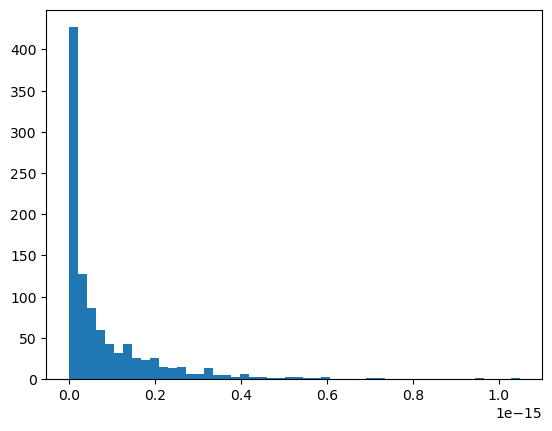

In [2]:

counts=plt.hist(Spectrum,50)
print(max(Spectrum))
print(min(Spectrum))
length=max(Spectrum)-min(Spectrum)

1.02813124746462e-15


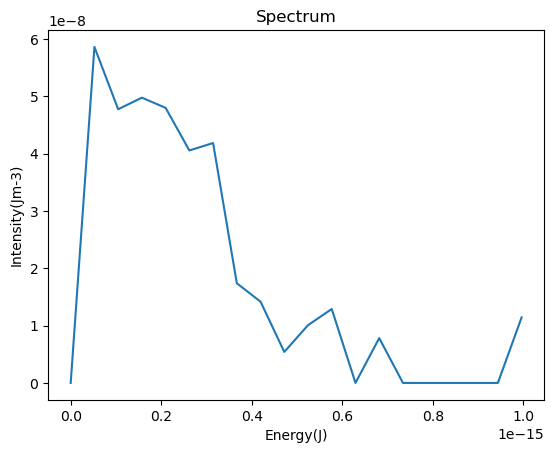

In [3]:
counts0=counts[0]
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

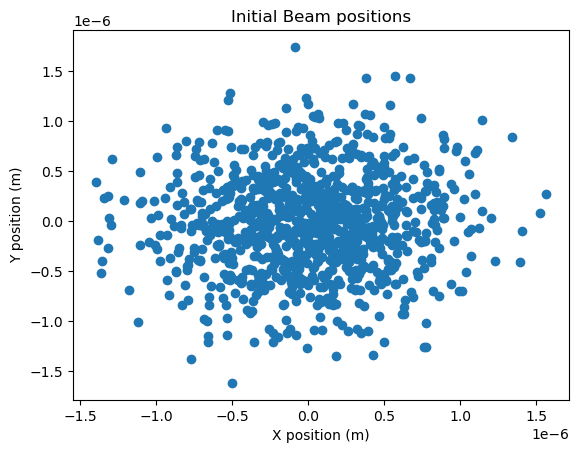

In [4]:

plt.title("Initial Beam positions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

plt.scatter(xinit,yinit)



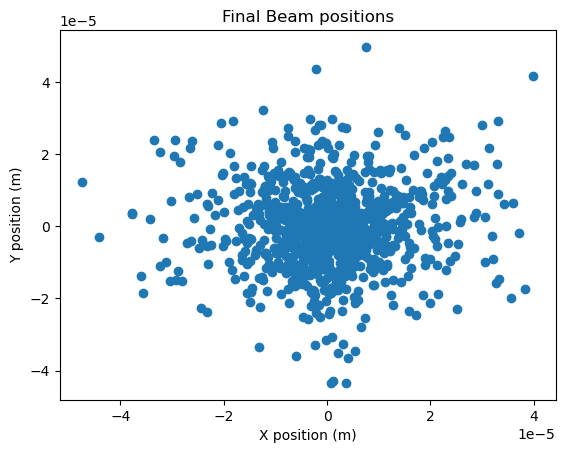

In [5]:

plt.title("Final Beam positions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

plt.scatter(xfinal,yfinal)

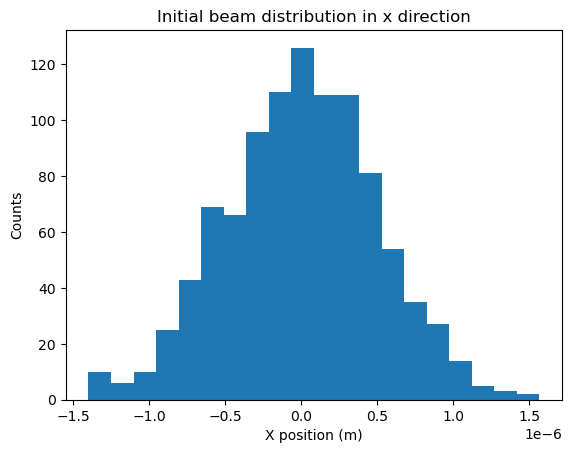

In [6]:
plt.title("Initial beam distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")

xdistributionI=plt.hist(xinit,20,range=[min(xinit),max(xinit)])


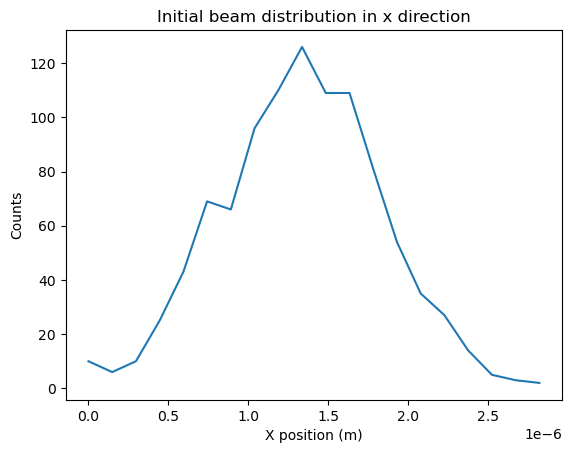

In [7]:
plt.title("Initial beam distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")
space=np.zeros(20)
n=0
for i in range(len(space)):
    space[i]=n*(max(xinit)-min(xinit))/20
    n=n+1
plt.plot(space,xdistributionI[0])

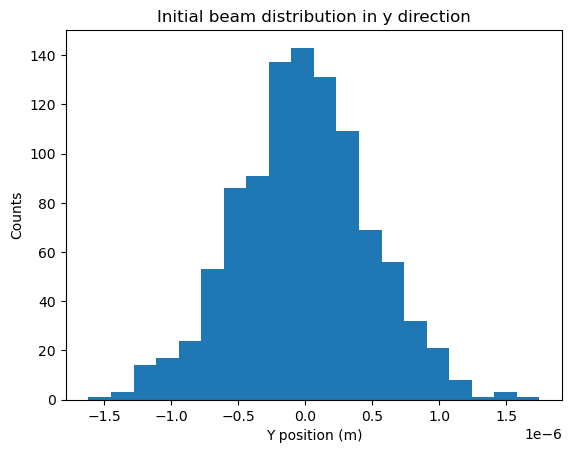

In [8]:
plt.title("Initial beam distribution in y direction")
plt.xlabel("Y position (m)")
plt.ylabel("Counts")

ydistributionI=plt.hist(yinit,20,range=[min(yinit),max(yinit)])

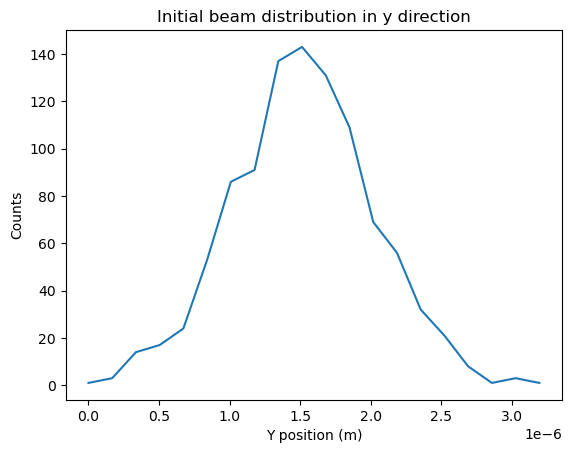

In [9]:
plt.title("Initial beam distribution in y direction")
plt.ylabel("Counts")
plt.xlabel("Y position (m)")
space=np.zeros(20)
n=0
for i in range(len(space)):
    space[i]=n*(max(yinit)-min(yinit))/20
    n=n+1
plt.plot(space,ydistributionI[0])

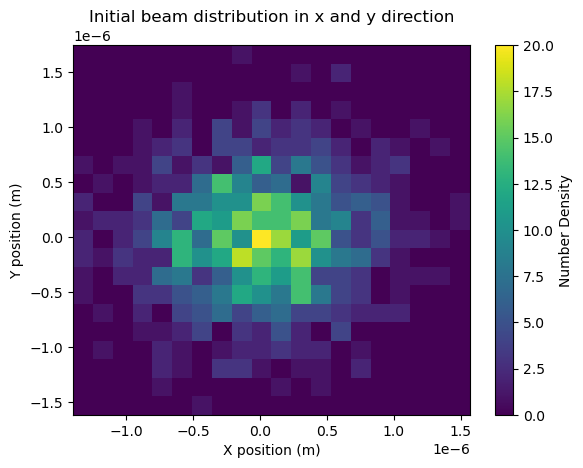

In [10]:

plt.title("Initial beam distribution in x and y direction")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.hist2d(xinit,yinit,20,density=False)
plt.colorbar(label='Number Density')

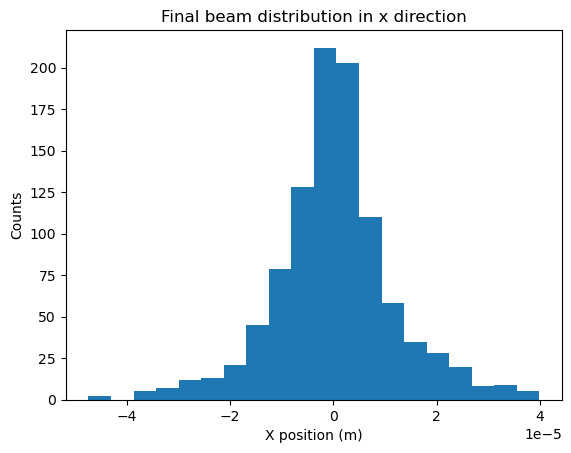

In [11]:
plt.title("Final beam distribution in x direction")
plt.xlabel("X position (m)")
plt.ylabel("Counts")


xdistributionF=plt.hist(xfinal,20,range=[min(xfinal),max(xfinal)])

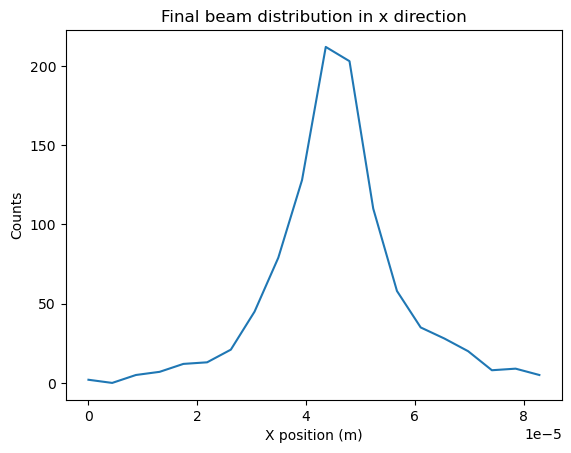

In [12]:
plt.title("Final beam distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")
space=np.zeros(20)
n=0
for i in range(len(space)):
    space[i]=n*(max(xfinal)-min(xfinal))/20
    n=n+1
plt.plot(space,xdistributionF[0])

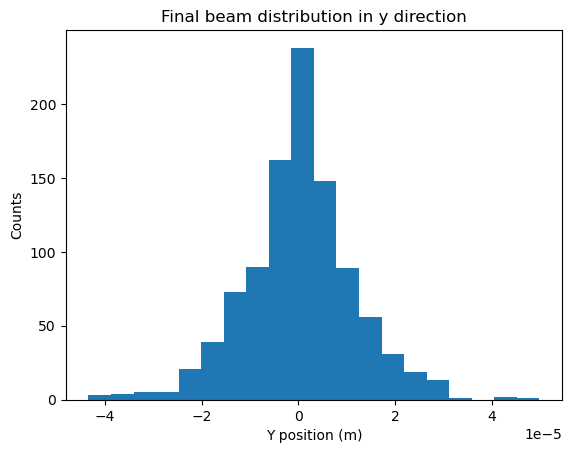

In [13]:
plt.title("Final beam distribution in y direction")
plt.xlabel("Y position (m)")
plt.ylabel("Counts")

YdistributionF=plt.hist(yfinal,20)

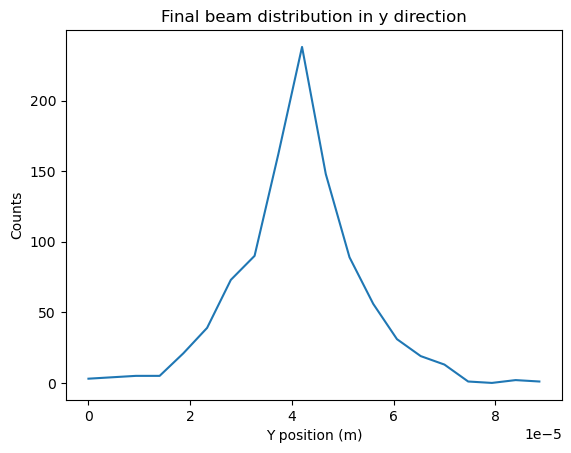

In [14]:
plt.title("Final beam distribution in y direction")
plt.ylabel("Counts")
plt.xlabel("Y position (m)")
space=np.zeros(20)
n=0
for i in range(len(space)):
    space[i]=n*(max(yfinal)-min(yfinal))/20
    n=n+1
plt.plot(space,YdistributionF[0])

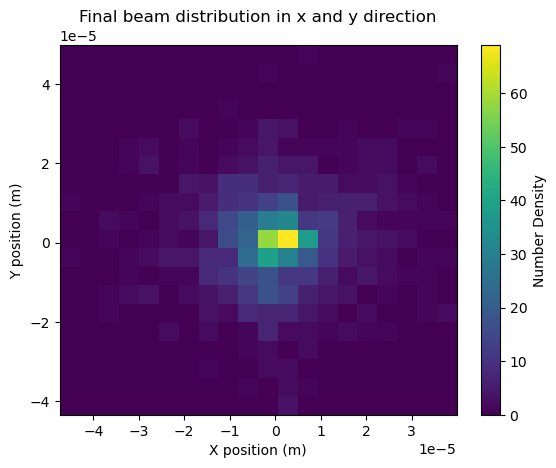

In [15]:

plt.title("Final beam distribution in x and y direction")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.hist2d(xfinal,yfinal,20,density=False)
plt.colorbar(label='Number Density')

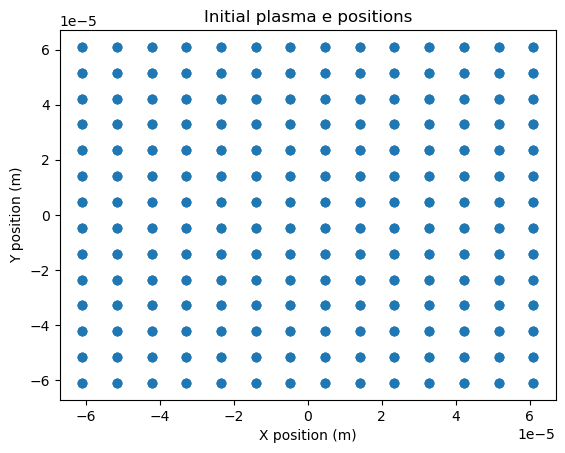

In [16]:
plt.title("Initial plasma e positions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

plt.scatter(xplasmainit,yplasmainit)


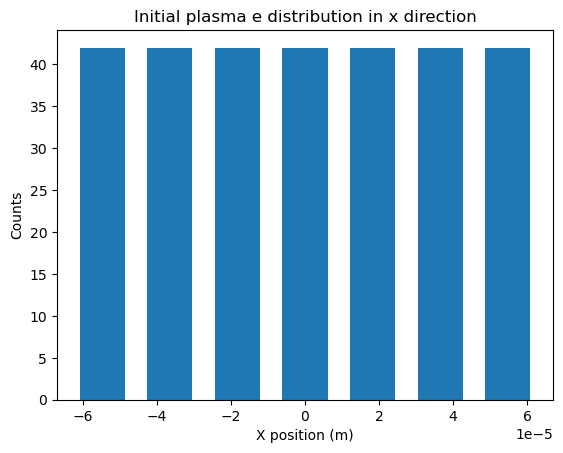

In [17]:

plt.title("Initial plasma e distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")

xdistributionI=plt.hist(xplasmainit,20)

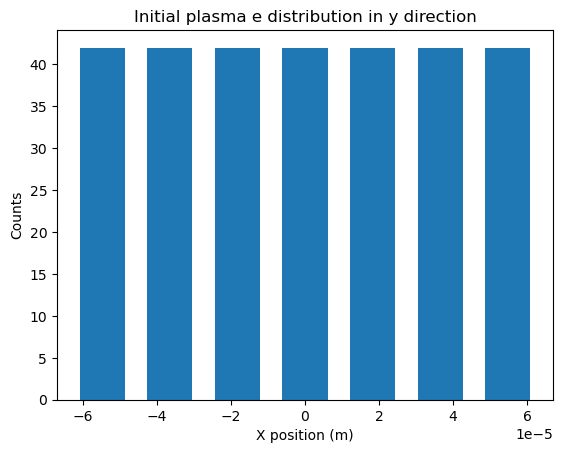

In [18]:
plt.title("Initial plasma e distribution in y direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")

xdistributionI=plt.hist(yplasmainit,20)

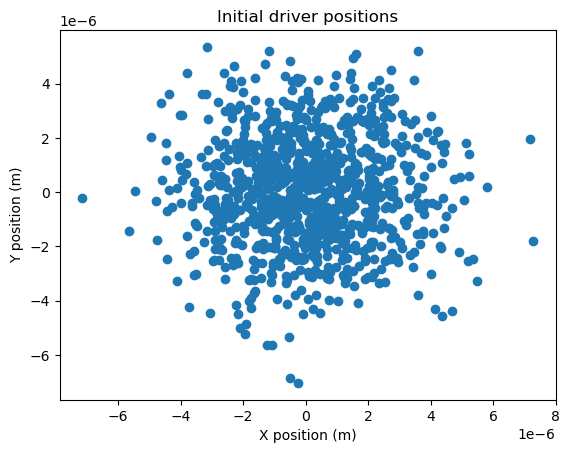

In [19]:
plt.title("Initial driver positions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

plt.scatter(xdriverinit,ydriverinit)

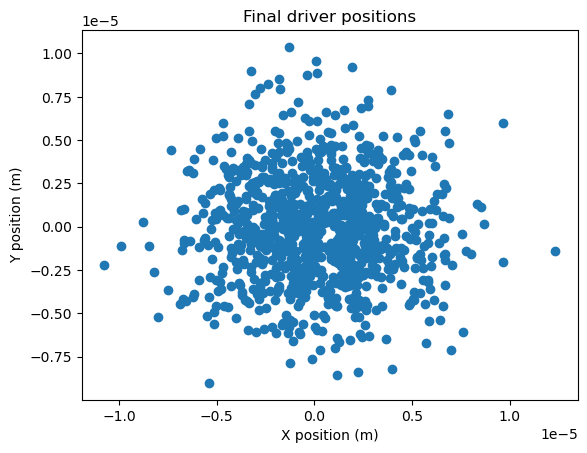

In [20]:
plt.title("Final driver positions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

plt.scatter(xdriverfinal,ydriverfinal)

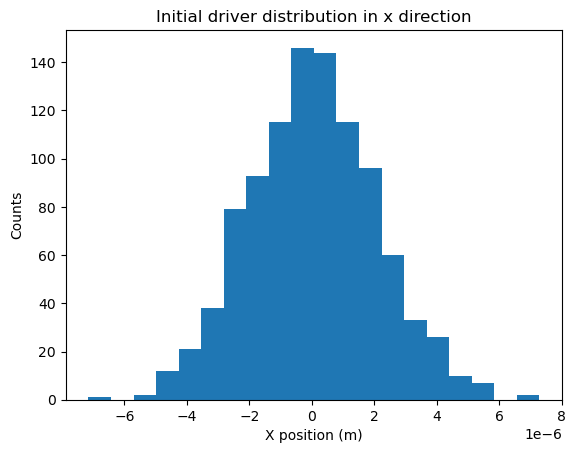

In [21]:
plt.title("Initial driver distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")

xdistributionI=plt.hist(xdriverinit,20,range=[min(xdriverinit),max(xdriverinit)])

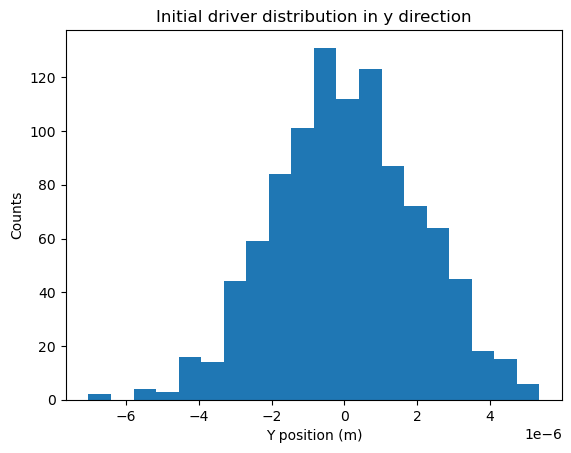

In [22]:
plt.title("Initial driver distribution in y direction")
plt.ylabel("Counts")
plt.xlabel("Y position (m)")

ydistributionI=plt.hist(ydriverinit,20,range=[min(ydriverinit),max(ydriverinit)])

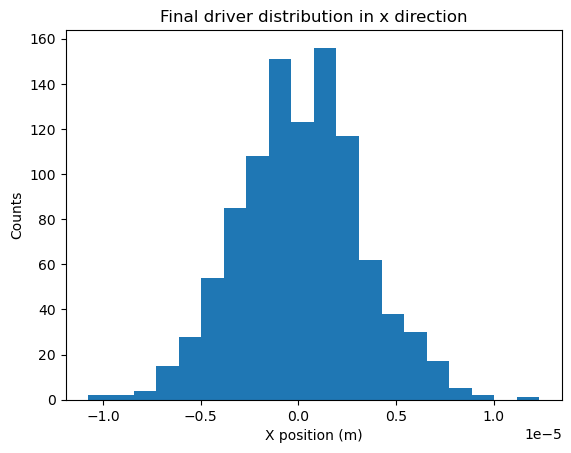

In [23]:
plt.title("Final driver distribution in x direction")
plt.ylabel("Counts")
plt.xlabel("X position (m)")

xdistributionF=plt.hist(xdriverfinal,20,range=[min(xdriverfinal),max(xdriverfinal)])

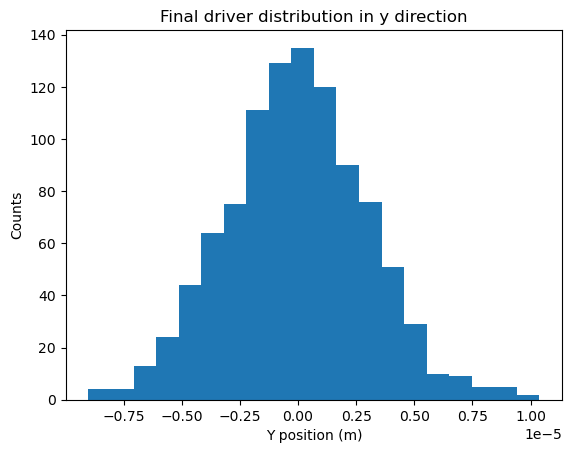

In [24]:
plt.title("Final driver distribution in y direction")
plt.ylabel("Counts")
plt.xlabel("Y position (m)")

ydistributionF=plt.hist(ydriverfinal,20,range=[min(ydriverfinal),max(ydriverfinal)])

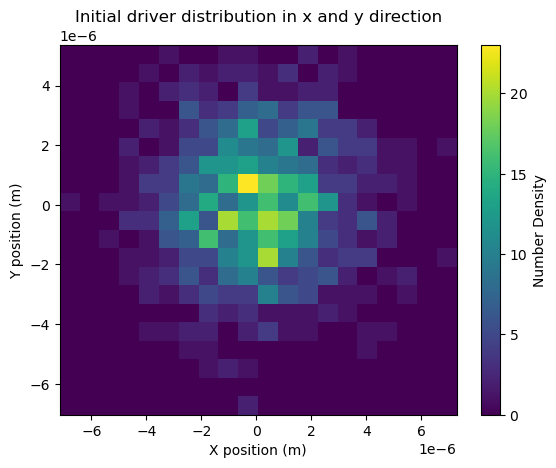

In [25]:
plt.title("Initial driver distribution in x and y direction")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.hist2d(xdriverinit,ydriverinit,20,density=False)
plt.colorbar(label='Number Density')

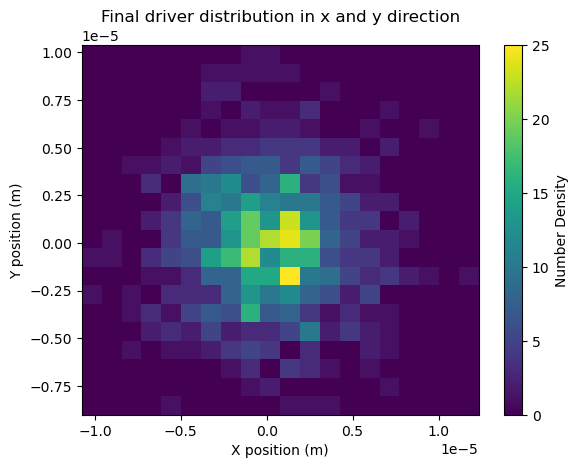

In [26]:
plt.title("Final driver distribution in x and y direction")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.hist2d(xdriverfinal,ydriverfinal,20,density=False)
plt.colorbar(label='Number Density')

yt : [INFO     ] 2024-04-04 16:57:33,925 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-04 16:57:33,925 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:33,926 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-04 16:57:33,926 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-04 16:57:34,340 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-04 16:57:34,341 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:34,341 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-04 16:57:34,342 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]
yt : [INFO     ] 2024-04-04 16:57:34,704 xlim = 0.009393 0.011807
yt : [INFO     ] 2024-04-04 16:57:34,705 ylim = -0.000150 0.000150
yt : [I


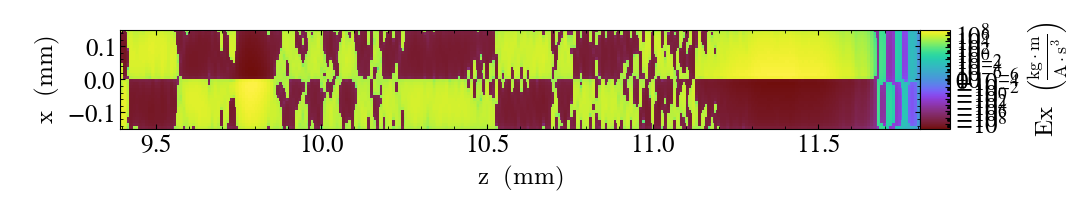

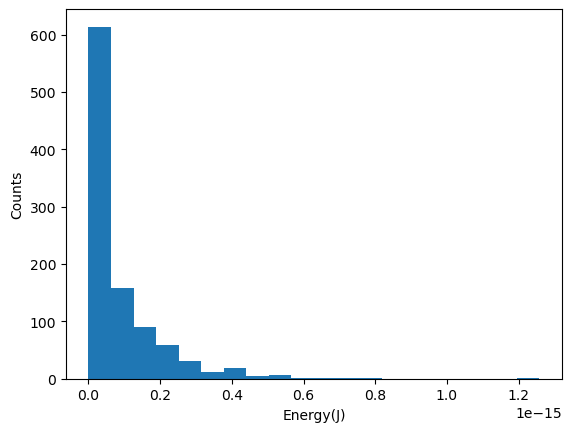

In [27]:
import yt
import numpy as np
import matplotlib.pyplot as plt


ds = yt.load('warpx/diags/diag1000000p(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()
xplasmainit= ad[('plasma_e','particle_position_x')].to_ndarray()
yplasmainit= ad[('plasma_e','particle_position_y')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()
unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19

#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
plt.xlabel("Energy(J)")
plt.ylabel("Counts")
counts=plt.hist(Spectrum,20)




np.shape(Ex_array)

yt.SlicePlot( ds, 1, 'Ex', origin='native' )

1.2577197002239173e-15
2.1123579500329343e-49


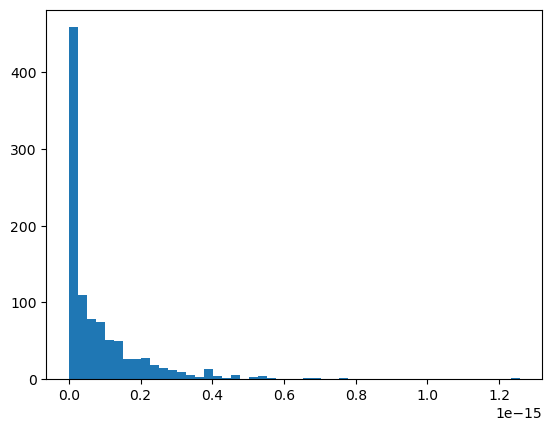

In [28]:
counts=plt.hist(Spectrum,50)
print(max(Spectrum))
print(min(Spectrum))
length=max(Spectrum)-min(Spectrum)

1.2330585296312914e-15


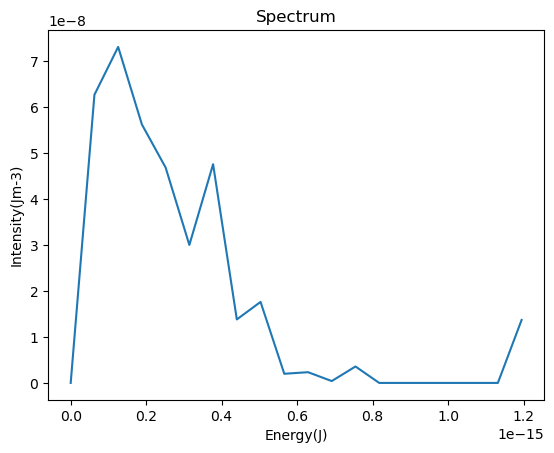

In [29]:
counts0=counts[0]
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-04-04 16:57:36,206 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-04 16:57:36,206 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:36,207 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-04 16:57:36,208 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-04 16:57:36,626 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-04 16:57:36,627 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-04 16:57:36,627 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-04 16:57:36,628 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]
yt : [INFO     ] 2024-04-04 16:57:36,989 xlim = 0.009393 0.011807
yt : [INFO     ] 2024-04-04 16:57:36,989 ylim = -0.000150 0.000150
yt : [I


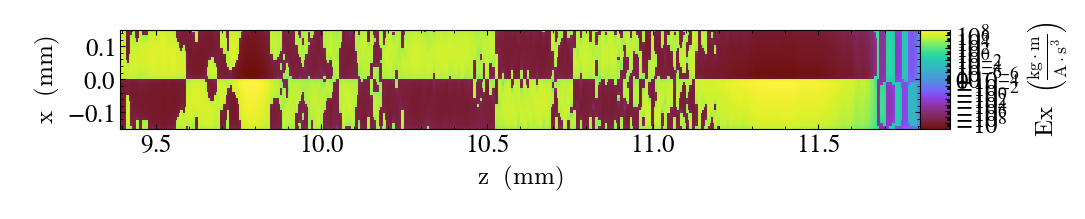

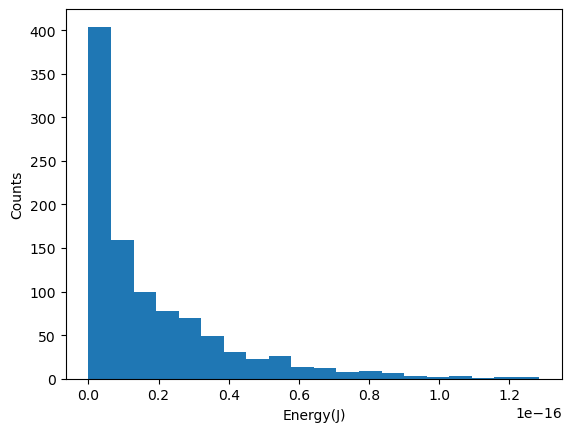

In [30]:

import yt
import numpy as np
import matplotlib.pyplot as plt


ds = yt.load('warpx/diags/diag1000000.old.8161300(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()
xplasmainit= ad[('plasma_e','particle_position_x')].to_ndarray()
yplasmainit= ad[('plasma_e','particle_position_y')].to_ndarray()
xdriverinit = ad[('driver','particle_position_x')].to_ndarray()
ydriverinit = ad[('driver','particle_position_y')].to_ndarray()
zdriverinit = ad[('driver','particle_position_z')].to_ndarray()
ds = yt.load('warpx/diags/diag1001270(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()
xdriverfinal = ad[('driver','particle_position_x')].to_ndarray()
ydriverfinal = ad[('driver','particle_position_y')].to_ndarray()
zdriverfinal = ad[('driver','particle_position_z')].to_ndarray()
unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19

#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
plt.xlabel("Energy(J)")
plt.ylabel("Counts")
counts=plt.hist(Spectrum,20)







np.shape(Ex_array)

yt.SlicePlot( ds, 1, 'Ex', origin='native' )

1.2855443189001274e-16
1.5558293640074458e-49


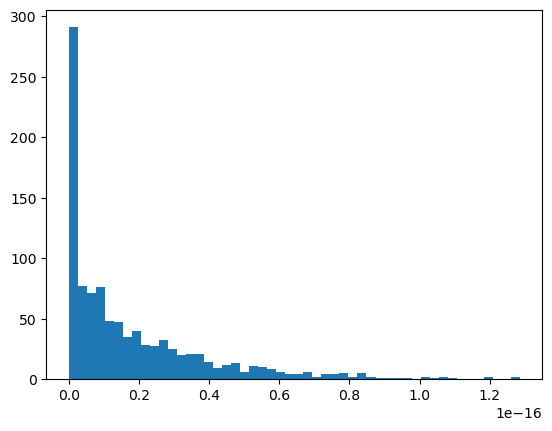

In [31]:
counts=plt.hist(Spectrum,50)
print(max(Spectrum))
print(min(Spectrum))
length=max(Spectrum)-min(Spectrum)

1.2603375675491445e-16


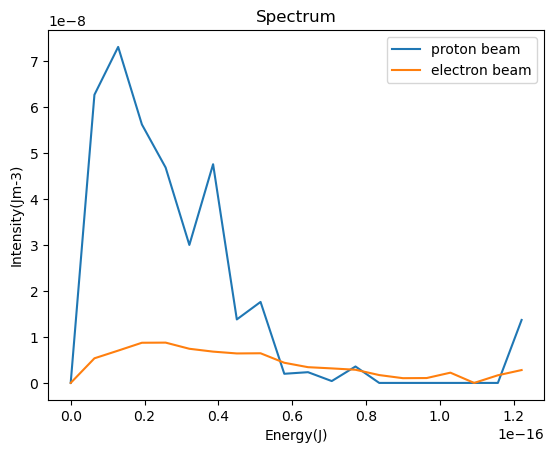

In [32]:
counts0=counts[0]
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity2=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec2=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity2)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec,label="proton beam")
plt.plot(Energyarr1,spec2,label="electron beam")
plt.legend()